#Scientific computing- Numpy, Matplotlib 

####Q1[2pts] plot the function f(x)=3*cos(x)*exp(-(x**2)/25) with -15<=x<=15. You will use 200 evaluations using linspace. Use labels for x and y axis

<function matplotlib.pyplot.show(close=None, block=None)>

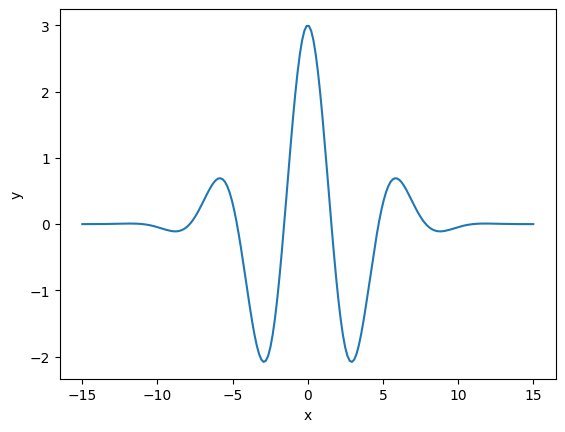

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*np.cos(x)*np.exp(-(x**2)/25)
x = np.linspace(-15,15,200)
y=f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show

#### Q2- [4pts] Complete the program using matplotlib that gives the following output (but yours should have red dashed curves). You will use 200 points between [0,10] to discretize the functions. Note: for full credit (4pts instead of 3pts) you must use one for loop __(for i in range(3):)__ to generate all three plots.
![picture](https://drive.google.com/uc?id=1bDa8v4dW9BIVnDwswDGKy2rhQtDIhWCx)

<function matplotlib.pyplot.show(close=None, block=None)>

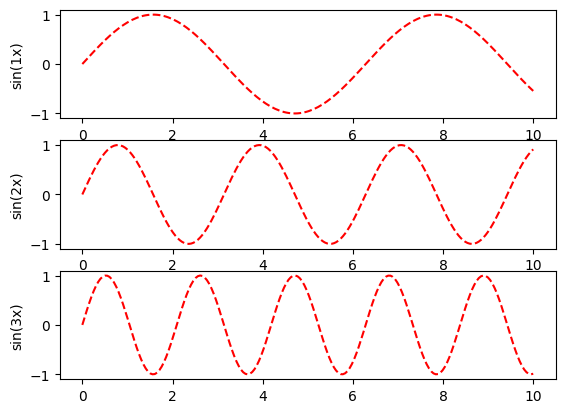

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,200)
fig, axs = plt.subplots(3)
for i in range(3):
    axs[i].plot(x, np.sin((i+1) * x), 'r--',)
    axs[i].set(ylabel = f'sin({i+1}x)')
plt.show



###Q3: [3pts]: The parametric equation of the circle is: x=r*cos(theta) and y=r*sin(theta) where r is the radius and theta represents the angle in [0,2*pi). Write a program that plots three circles with matplotlib in the same Figure (you will consider 360 values for theta and use np.arange to generate them). We note that the inner circle is red (with radius 0.5), while the first outer circle is dashed blue (with radius 1.5), and the second outer circle is dashed green (with radius 4.5). Note: you will use plt.axis("equal") to make sure you see a circle and not an ellipse. Hint: once theta is discretized, compute x and y, if you then plot(x,y) you will obtain a circle of radius. Note: the angle for sin and cos is in radian 

<function matplotlib.pyplot.show(close=None, block=None)>

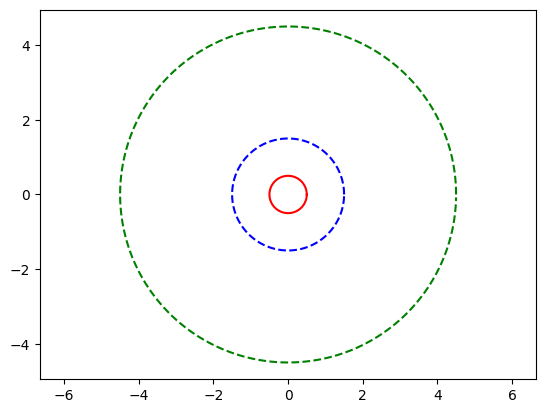

In [68]:
import numpy as np
import matplotlib.pyplot as plt

theta=np.arange(0,2*np.pi,2*np.pi/360)
x=np.cos(theta)
y=np.sin(theta)
plt.plot(.5*x, .5*y, 'r')
plt.plot(1.5*x, 1.5*y, 'b--')
plt.plot(4.5*x, 4.5*y, 'g--')
plt.axis("equal")
plt.show




### Q4 [3pts]: Using the previous plot, let us play darts and let us see how lucky you are!! Using a uniform random distribution __(seed of 1)__ what is the measured probability (%) to reach the center (inside red circle) after 1000000 trials? Note: we consider that all darts end up in the square board [-6,6) for x and [-6,6) for y. You can use the function uniform from np.random.uniform (look it up) to set up (independently) both x and y. You will also report the probability (in %) to shoot between circles. Hint: a point (x,y) belongs to a circle of radius r if sqrt(x^2+y^2)<=r. The boundary of circles are included in the probability. The output should be:

>Bull's eye (red circle)= 0.5447%

>Between red-blue circles= 4.3584%

>Between blue-green circles= 39.3057%


In [16]:
import numpy as np
np.random.seed(1)

n = 1000000
red = .5
blue = 1.5
green = 4.5

x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

dist = np.sqrt(x**2 + y**2)

redhit = np.sum(dist<=red)
bluehit = np.sum((dist>red) & (dist<=blue))
greenhit = np.sum((dist> blue) & (dist<=green))

red_prob = redhit/n*100
blue_prob = bluehit/n*100
green_prob = greenhit/n*100

print(f"Bull's eye (red circle) = {red_prob}%")
print(f"Between red-blue circles = {blue_prob}%")
print(f"Between blue-green circles = {green_prob}%")

Bull's eye (red circle) = 0.5447%
Between red-blue circles = 4.3584%
Between blue-green circles = 39.3057%


### Bonus[8pts]-
In class we used the Monte-Carlo stochastic integration technique to find the value $\pi$ by calculating the area of a circle of radius 1 (look at the code/notes). Here we propose to
use another example where we want to claculate the area of a particular 2D triangle. You will call the coordinates corresponding to the 3 corners of the triangle $x_A,y_A=0.4,0.3$ for point 1, $x_B,y_B=3.5,2.55$ for point 2 and $x_C,y_C=1.1,3.4$ for point 3. For performing the integration, we will use $n=1,000,000$ random samples in a domain $\Omega$. 

You will chose a domain $\Omega$ to be a square of dimension [$x_{min}=\min(x_A,x_B,x_C)$:$x_{max}=\max(x_A,x_B,x_C)$] for
x and [$y_{min}=\min(y_A,y_B,y_C)$:$y_{max}=\max(y_A,y_B,y_C)$] for y, so it will enclose the triangle. We note that $\Omega$ covers a total area ($|\Omega|$) equal to $(y_{max}-y_{min})*(x_{max}-x_{min})$.  To summarize, at first you need to generate the coordinates $(x_i,y_i)$  1 million random coordinates using numpy.random.uniform on $\Omega$. __Requirement__: Use $5$ for the random seed.


To represent the integration on the triangle, the function $f(x_i,y_i)$  must now satisfy:

$$f(x_i,y_i)=\left\{\begin{array}{l}1 \quad \text{if} \quad (x_i,y_i) \quad \text{belongs to the triangle} \\ 0 \quad \text{otherwise} \end{array}\right.,$$

The area of the triangle that we are looking for, can then be approximated by:
$$A\simeq\frac{|\Omega|}{n}\sum_{i=1}^n f(x_i,y_i),$$

__So how do we determine if a random point of coordinate $(x_i,y_i)$ lies inside the triangle?__

The barycentric coordinate system tells us that any point  $(x,y)$ can be obtained using the coordinates of the vertices of a triangle
via linear combinations of these coordinates. The sum of the coefficients of the linear combinations should also be equal to 1.
In 2D, we get:
$$\left\{\begin{array}{l}a_1x_1+a_2x_2+a_3x_3=x \\a_1y_1+a_2y_2+a_3y_3=y \\a_1+a_2+a_3=1   \end{array}\right.$$
We note that $x_1$,$x_2$,$x_3$ are the x-coordinates of the triangle vertices,   $y_1$,$y_2$,$y_3$ are the y-coordinates of the triangle vertices,
$x$,$y$ represents the coordinate of a given point (our random point/sample),
and $a_1$,$a_2$,$a_3$ are the coefficient of the linear combination that must be determined.
The expression above is then a system of linear equations with 3 unknowns  $a_1$,$a_2$,$a_3$.
In high-school math, you have learned how to solve such system by substitution or elimination.
You could do the same here and get a formula for $a_1$,$a_2$,$a_3$ in function
of all other known quantities. Another approach is to use a matrix system (linear algebra), the system matrix associated
to the equations above is given by:
 $$\begin{bmatrix}
  x_1 & x_2 & x_3 \\
  y_1 & y_2 & y_3 \\
  1 & 1 & 1
  \end{bmatrix}
  \begin{bmatrix}
  a_1 \\
  a_2\\
  a_3
  \end{bmatrix}=
   \begin{bmatrix}
  x \\
  y\\
  1
   \end{bmatrix}
   $$



 The program will display the barycentric matrix that wil be needed to perform various evaluations about the area of the triangle.
    Indeed, you will need to use the solve function offers by Numpy to obtain the solutions  $a_1$,$a_2$,$a_3$ (as briefly seen in class notes), for various random samples.

   Once  $a_1$,$a_2$,$a_3$ obtained, the barycentric approach tells us that if all these coefficients are greater than 0, then
   the point $(x,y)$ must be located inside the triangle!

  
Like we did for the pi calculation, you need to count how many of the sample random numbers are within the triangle. You will need to calculate the coefficients $a_1$,$a_2$,$a_3$ of
  each random point by solving the linear system. The matrix can be generated only once at the beginning of the simulation.
  At the same time you are counting the points inside the triangle, you can calculate the approximate values of the area of the triangle given by the integration formula.

Plot the variation of the claculation of the area of the triangle with the number of sample points (y in scale).

__Requirement__: Your calculations should reproduce the output given here and it should be reasonably fast (mine takes 12 seconds).


Barycentric Matrix
[[0.4  3.5  1.1 ]
 [0.3  2.55 3.4 ]
 [1.   1.   1.  ]]
Using 10 samples, area of triangle is 3.8440000000000003
Using 100 samples, area of triangle is 3.6518000000000006
Using 1000 samples, area of triangle is 4.141910000000001
Using 10000 samples, area of triangle is 4.047732000000001
Using 100000 samples, area of triangle is 4.019670800000001
Using 1000000 samples, area of triangle is 4.021640850000001


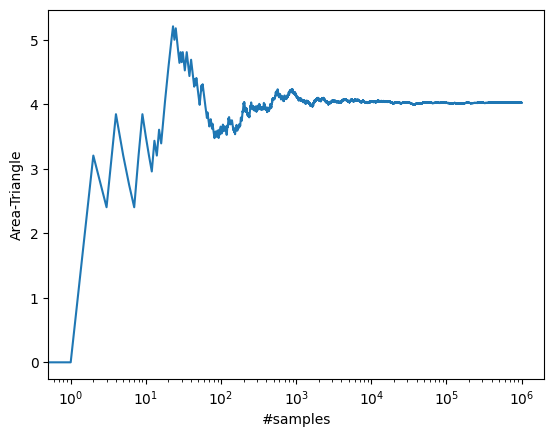

Barycentric Matrix
[[0.4  3.5  1.1 ]
 [0.3  2.55 3.4 ]
 [1.   1.   1.  ]]
Using 10 samples, the area of triangle is 3.8440000000000003
Using 100 samples, the area of triangle is 3.6518000000000006
Using 1000 samples, the area of triangle is 4.14191
Using 10000 samples, the area of triangle is 4.047732000000001
Using 100000 samples, the area of triangle is 4.019670800000001
Using 1000000 samples, the area of triangle is 4.021640850000001


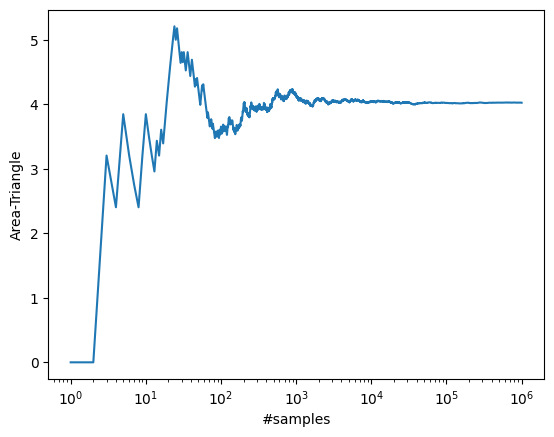

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

print("Barycentric Matrix")
matrix = np.array([[0.4,3.5,1.1],[0.3,2.55,3.4],[1,1,1]])
print(matrix)

n = 1000000
x = np.random.uniform(0.4, 3.5, n)
y = np.random.uniform(0.3, 3.4, n)
z = np.ones((1, n))
b = np.vstack((x, y, z))

ans = np.linalg.solve(matrix, b[:, :])

negative = np.any(ans < 0, axis=0)
ans[:, negative] = 0
ans = ans[:-2]
positive = np.any(ans > 0, axis=0)
ans[:, positive] = 1


def prin(n, ans = ans):
    o = (3.5 - 0.4) * (3.4 - 0.3)
    return np.sum(ans[:,:n]) * (o / n)

numm = 1
for _ in range(6):
    numm = numm*10
    print(f"Using {numm} samples, the area of triangle is {prin(numm)}")
    
sample_sizes = np.logspace(0, np.log10(n), num=10000, dtype=int)
func_values = np.vectorize(lambda n: prin(n, ans))(sample_sizes)

plt.plot(sample_sizes, func_values)
plt.xlabel("#samples")
plt.ylabel("Area-Triangle")
plt.xscale("log")
plt.show()
